<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_7/les_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sys import path
# path = '/home/sergio/Desktop/DataScienceHW/example_kaggle/les_7'
path = '/content'

In [33]:
from google.colab import files
files.upload()
files.upload()
files.upload()

Saving movie_ids.txt to movie_ids (1).txt


Saving movieParams.mat to movieParams (1).mat


Saving movies.mat to movies (1).mat


{'movies (1).mat': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Feb 26 19:33:08 2025\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01IM\x0e\x00\x00\x00\xd0\x00\x00\x00\x06\x00\x00\x00\x08\x00\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x08\x00\x00\x00\x05\x00\x00\x00\x04\x00\x00\x00\x01\x00\x01\x00Y\x00\x00\x00\x0c\x00\x00\x00\xa0\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [34]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import matplotlib as matplotlib

from scipy import optimize
from scipy.io import loadmat


Кількість фільмів: 5
Перший фільм: Toy Story (1995)


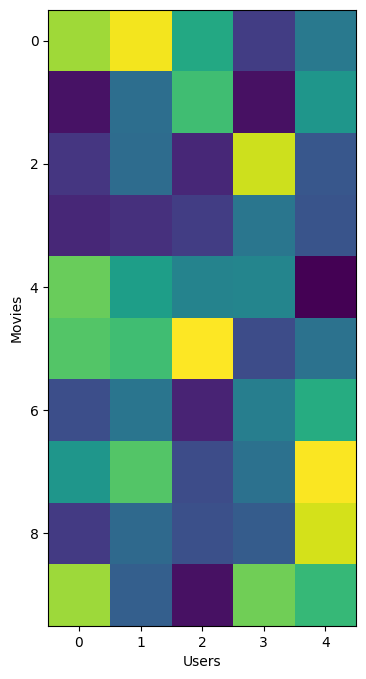

In [42]:

# Функція для нормалізації рейтингу
def normalizeRating(Y, R):
    m, n = Y.shape
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros(Y.shape)

    for i in range(m):
        idx = R[i,:] == 1
        Ymean[i] = np.mean(Y[i,idx]) if np.any(idx) else 0
        Ynorm[i,idx] = Y[i,idx] - Ymean[i]

    return Ynorm, Ymean

# Функція для завантаження списку фільмів
def loadMovieList():
    with open(os.path.join(path, 'movie_ids.txt'), encoding='ISO-8859-1') as fid:
        movies = fid.readlines()

    movieNames = []
    for movie in movies:
        parts = movie.split()
        movieNames.append(' '.join(parts[1:]).strip())

    return movieNames

# Перевірка завантаження списку фільмів
names = loadMovieList()
print(f"Кількість фільмів: {len(names)}")
if names:
    print(f"Перший фільм: {names[0]}")
# Генерація випадкової матриці рейтингів
Y = np.random.rand(10, 5)
plt.figure(figsize=(10,8))
plt.imshow(Y)
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show()

In [36]:
!pwd

/content


In [37]:
path

'/content'

In [38]:
names = loadMovieList()

In [39]:
print(len(names))
names[0]

5


'Toy Story (1995)'

In [62]:
def cofiCostFunc(params, Y, R,num_users, num_movies,
                 num_features, lambda_=0.0):
  X = params[:num_movies*num_features].reshape(num_movies, num_features)
  Theta = params[num_movies*num_features:].reshape(num_users, num_features)

  J = 0
  X_grad = np.zeros(X.shape)
  Theta_grad = np.zeros(Theta.shape)


  # =================   YOUR CODE HERE ==========================

  J = (1/2)*np.sum(np.square((X.dot(Theta.T)-Y)*R)) + (lambda_/2)*np.sum(np.square(X)) + \
  (lambda_/2)*np.sum(np.square(Theta))

  for i in range(R.shape[0]):
    idx = np.where(R[i,:] == 1)[0]
    Theta_temp = Theta[idx,:]
    Y_temp = Y[i,idx]
    X_grad[i,:] = np.dot(np.dot(X[i,:], Theta_temp.T) - Y_temp, Theta_temp) + lambda_*X[i,:]

  for j in range(R.shape[1]):
    idx = np.where(R[:,j] == 1)[0]
    X_temp = X[idx,:]
    Y_temp = Y[idx,j]
    Theta_grad[j, :] = np.dot(X_temp.T, np.dot(X_temp, Theta[j, :]) - Y_temp) + lambda_ * Theta[j, :]


  # =============================================================

  grad = np.concatenate([X_grad.ravel(), Theta_grad.ravel()])

  return J, grad


In [60]:
data = loadmat(os.path.join(path, 'movieParams.mat'))
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_movies', 'num_users', 'num_features'])


In [61]:
X, Theta, num_users, num_movies, num_features = data['X'], data['Theta'], data['num_users'], data['num_movies'], data['num_features']

#  Reduce the data set size so that this run faster
num_users = 4
num_movies = 5
num_features = 3

X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, 0:num_users]

R = (Y != 0).astype(int)
R = R[:num_movies, 0:num_users]

#  Evaluate Cost Function

J, _ = cofiCostFunc(np.concatenate([X.ravel(), Theta.ravel()]),
                    Y, R, num_users, num_movies, num_features)
print(f'Cost at loaded parameters:  {J:0.2f}')
print('this value should be about 22.22')

Cost at loaded parameters:  3.26
this value should be about 22.22
